<a href="https://colab.research.google.com/github/riyasachdeva04/open-cv/blob/main/img_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving form.jpg to form.jpg


In [3]:
from google.colab import files
uploaded = files.upload()

Saving scanned-form.jpg to scanned-form.jpg


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#read img
refFilename = 'form.jpg'
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

scannedFile = 'scanned-form.jpg'
im2 = cv2.imread(scannedFile, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Scanned Form')

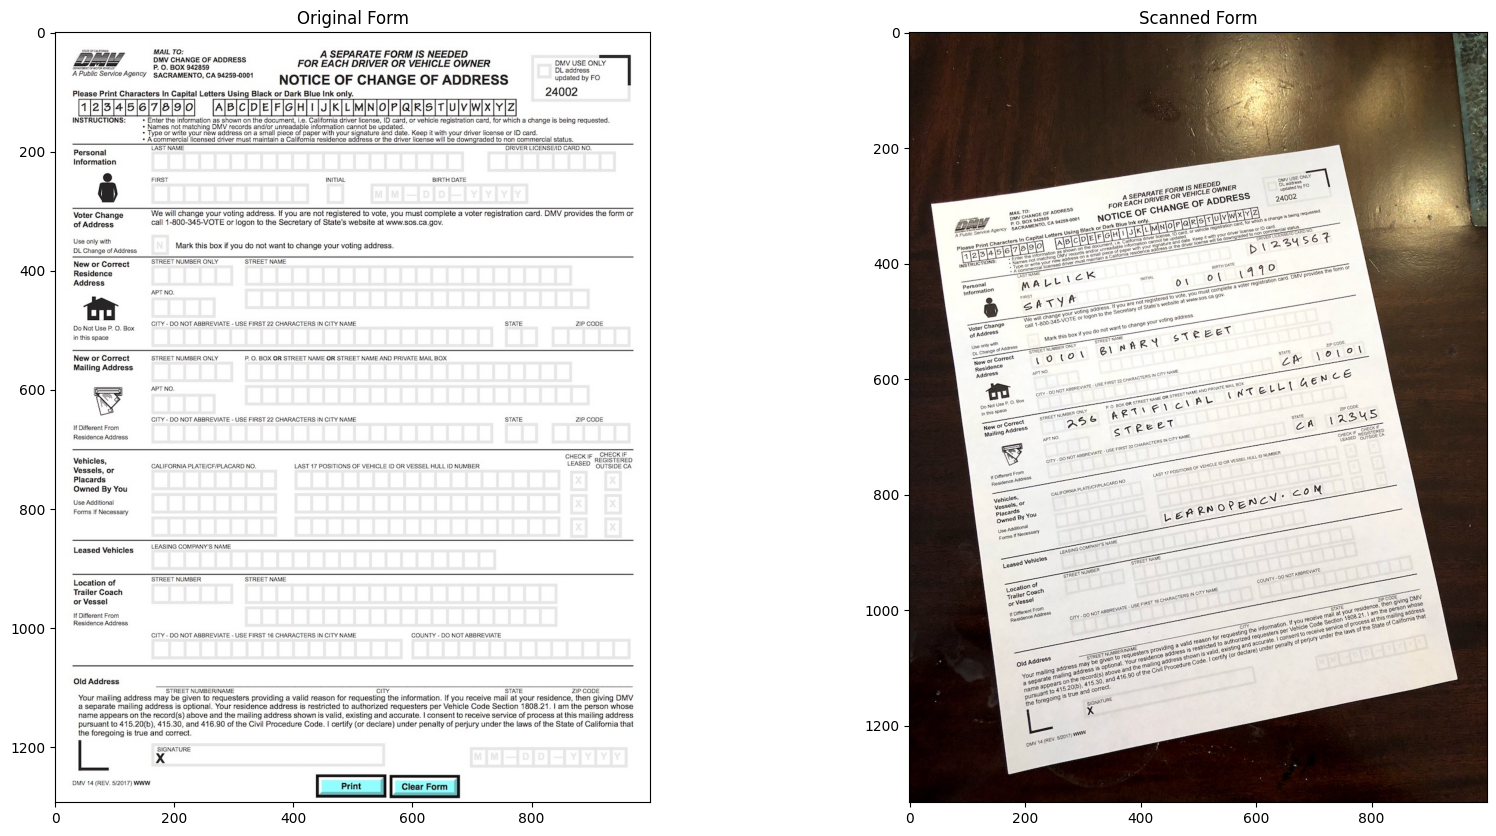

In [6]:
plt.figure(figsize = [20, 10])
plt.subplot(121)
plt.imshow(im1)
plt.title('Original Form')
plt.subplot(122)
plt.imshow(im2)
plt.title('Scanned Form')

FINDING KEYPOINTS

In [11]:
im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

#detecting features and computing descriptors
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

#display
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage = np.array([]), color = (255, 0, 0), flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS )
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage = np.array([]), color = (255, 0, 0), flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS )


Text(0.5, 1.0, 'Scanned')

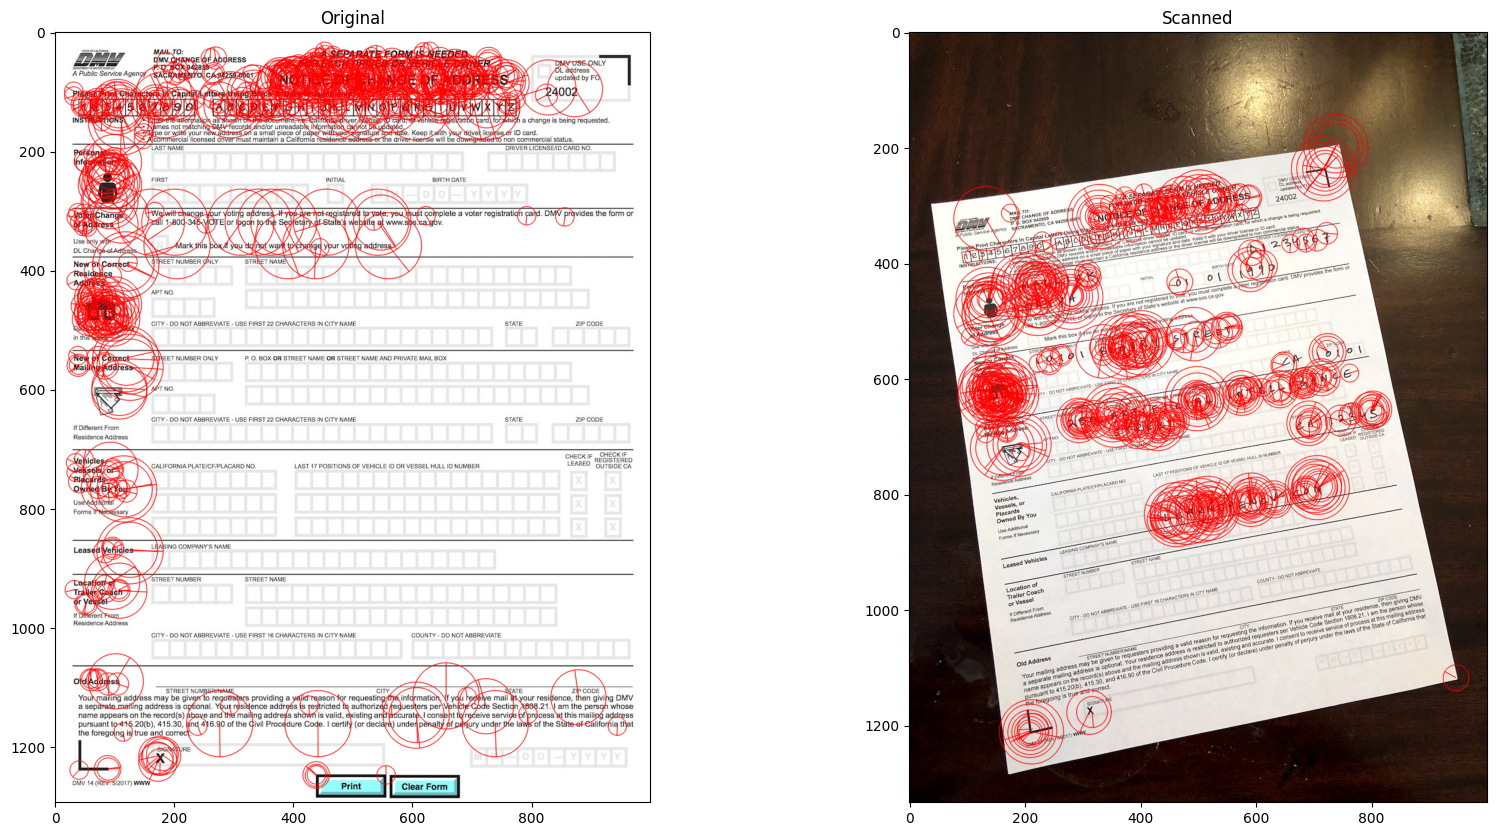

In [12]:
plt.figure(figsize= [20, 10])
plt.subplot(121)
plt.imshow(im1_display)
plt.title('Original')

plt.subplot(122)
plt.imshow(im2_display)
plt.title('Scanned')

In [18]:
#matching the keypoints

matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

#sort by score
matches = sorted(matches, key = lambda x:x.distance, reverse=False)

#remove bad matches
numGoodMAtches = int(len(matches) * 0.1)
matches = matches[:numGoodMAtches]

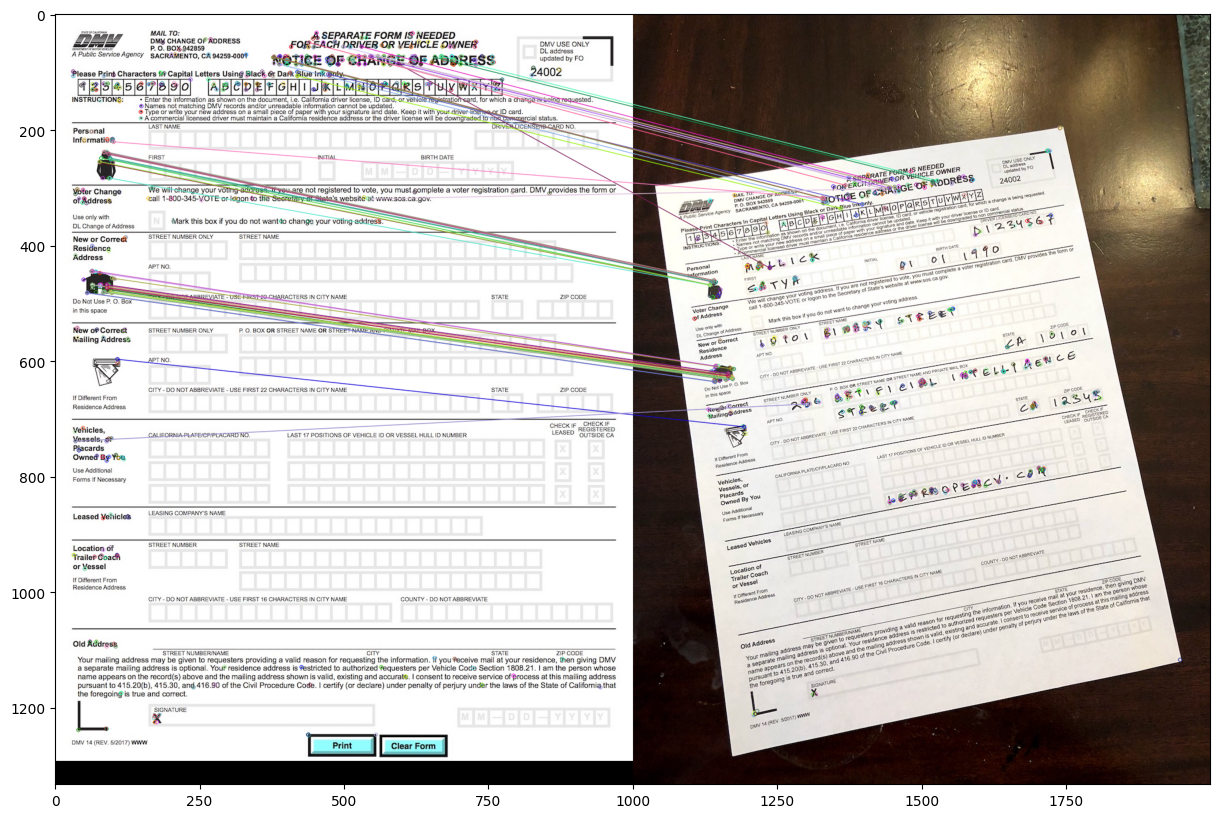

In [19]:
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize = [40, 10])
plt.imshow(im_matches)


In [25]:
#homography

#extract loc of good matches
points1 = np.zeros((len(matches), 2), dtype = np.float32)
points2 = np.zeros((len(matches), 2), dtype = np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt

#find homography

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

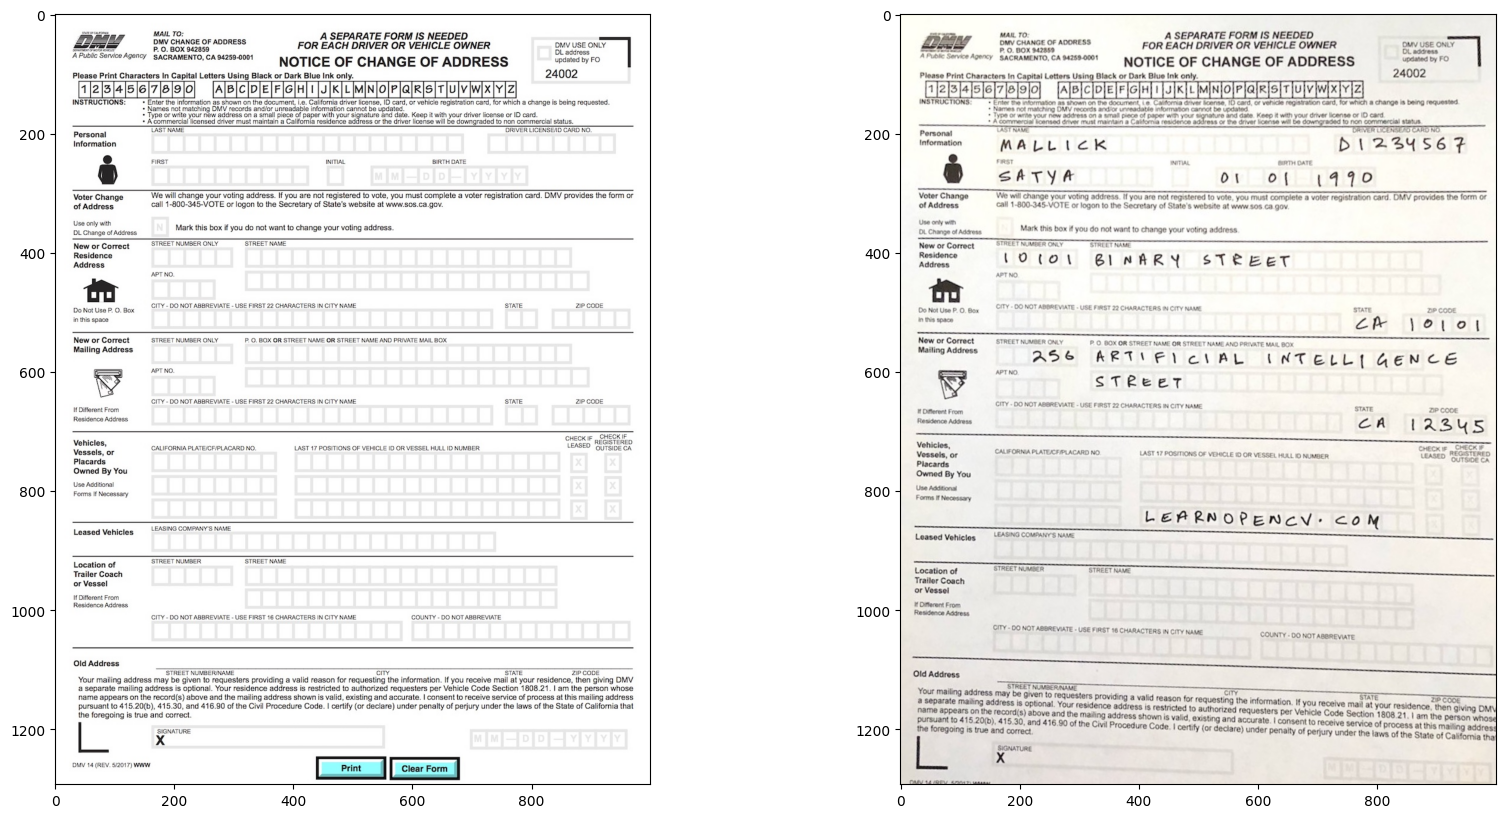

In [26]:
#warping

#use homography to warp img

height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

#display results
plt.figure(figsize = [20, 10])
plt.subplot(121)
plt.imshow(im1)
plt.subplot(122)
plt.imshow(im2_reg)